<a href="https://colab.research.google.com/github/IbrahimHammed/DSOCT24/blob/main/DSOCT24Lesson009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import
import pandas as pd

In [2]:
# Define file path
filePath = '/content/drive/MyDrive/PythonDatasets/iowa_sales.csv'

In [3]:
myChunkSize = 300000
chunks = pd.read_csv(filePath, chunksize=myChunkSize, low_memory=False)

# Append the elements in chucks to one another
df = pd.concat(chunks)

# Gives the top 3 records
df.head(3)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S24127700024,02/19/2015,3678,"SXXXX SXXX, TXX",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77.0,Polk,...,41783,Ux Bxxx Rxxxxxxxx Vxxxx Mxxx,6,500,4.89,7.34,2,14.68,1.0,0.26
1,S15066200002,10/10/2013,2633,HX-VXX #3 / BDI / DXX MXXXXX,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,Polk,...,904969,Sxxx Pxxxxxx Sxxx Dxxxxx Bxxxxx,6,750,14.99,22.49,6,134.94,4.5,1.19
2,S19323500030,06/03/2014,2607,HX-VXX WXXX XXX SXXXXXX / SXXXXXXXXX,520 SO FREMONT,SHENANDOAH,51601,POINT (-95.385111 40.761736),73.0,Page,...,45277,Pxxxxxxxx Wxxxx Rxx,12,1000,4.34,6.51,12,78.12,12.0,3.17


In [4]:
df.shape

(19666763, 24)

In [5]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [7]:
dfSummary = df[['Invoice/Item Number', 'Date', 'Store Number', 'City', 'Item Number', 'Item Description', 'Pack', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)']]
dfSummary.head(3)

,Invoice/Item Number,Date,Store Number,City,Item Number,Item Description,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,S24127700024,02/19/2015,3678,DES MOINES,41783,Ux Bxxx Rxxxxxxxx Vxxxx Mxxx,6,4.89,7.34,2,14.68
1,S15066200002,10/10/2013,2633,DES MOINES,904969,Sxxx Pxxxxxx Sxxx Dxxxxx Bxxxxx,6,14.99,22.49,6,134.94
2,S19323500030,06/03/2014,2607,SHENANDOAH,45277,Pxxxxxxxx Wxxxx Rxx,12,4.34,6.51,12,78.12


In [8]:
dfSummary.shape

(19666763, 11)

In [5]:
# This is a method for loading specific columns with names known in advance
desiredColumns = ['Invoice/Item Number', 'Date', 'Store Number', 'City', 'Item Number', 'Item Description', 'Pack', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)']

myChunkSize = 300000
chunks = pd.read_csv(filePath, chunksize=myChunkSize, low_memory=False, usecols=desiredColumns, nrows=9000000)

# Append the elements in chucks to one another
dfFiltered = pd.concat(chunks)

# Gives the top 3 records
dfFiltered.head(3)

,Invoice/Item Number,Date,Store Number,City,Item Number,Item Description,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,S24127700024,02/19/2015,3678,DES MOINES,41783,Ux Bxxx Rxxxxxxxx Vxxxx Mxxx,6,4.89,7.34,2,14.68
1,S15066200002,10/10/2013,2633,DES MOINES,904969,Sxxx Pxxxxxx Sxxx Dxxxxx Bxxxxx,6,14.99,22.49,6,134.94
2,S19323500030,06/03/2014,2607,SHENANDOAH,45277,Pxxxxxxxx Wxxxx Rxx,12,4.34,6.51,12,78.12


In [6]:
dfFiltered.shape

(9000000, 11)

In [13]:
# Correlation
dfFiltered['State Bottle Retail'].corr(dfFiltered['Bottles Sold'])

-0.038347217400306596

In [15]:
# Correlation
dfFiltered['State Bottle Retail'].corr(dfFiltered['Sale (Dollars)'])

0.10593646852520294

In [16]:
# Correlation
dfFiltered['Bottles Sold'].corr(dfFiltered['Sale (Dollars)'])

0.8518654796606981

In [17]:
dfCorr = dfFiltered[['Pack','State Bottle Cost','State Bottle Retail','Bottles Sold','Sale (Dollars)']]
dfCorr.head()

,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,6,4.89,7.34,2,14.68
1,6,14.99,22.49,6,134.94
2,12,4.34,6.51,12,78.12
3,12,5.54,8.31,1,8.31
4,6,31.00,46.49,2,92.98


In [23]:
dfCorr.shape

(9000000, 5)

In [24]:
# Correlation Matrix & Graphic Representation
corrMatrix = dfCorr.corr()
corrMatrix

,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
Pack,1.000000,-0.256751,-0.257414,0.103695,-0.048060
State Bottle Cost,-0.256751,1.000000,0.999958,-0.038367,0.105850
State Bottle Retail,-0.257414,0.999958,1.000000,-0.038347,0.105936
Bottles Sold,0.103695,-0.038367,-0.038347,1.000000,0.851865
Sale (Dollars),-0.048060,0.105850,0.105936,0.851865,1.000000


<Axes: >

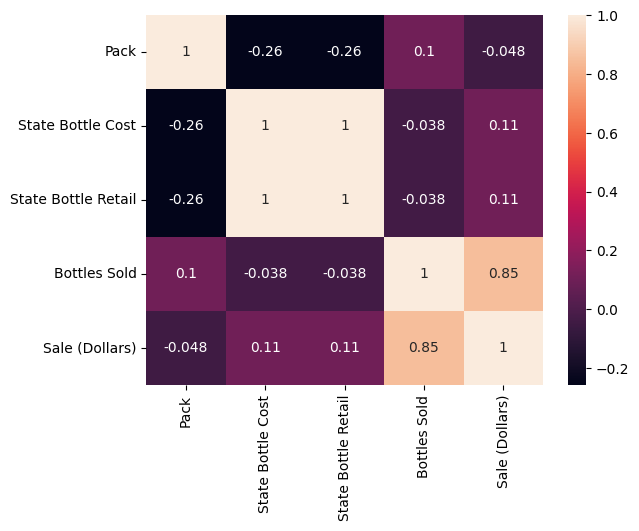

In [25]:
import seaborn as sns

sns.heatmap(corrMatrix, annot=True)

In [26]:
dfFiltered.head(3)

,Invoice/Item Number,Date,Store Number,City,Item Number,Item Description,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,S24127700024,02/19/2015,3678,DES MOINES,41783,Ux Bxxx Rxxxxxxxx Vxxxx Mxxx,6,4.89,7.34,2,14.68
1,S15066200002,10/10/2013,2633,DES MOINES,904969,Sxxx Pxxxxxx Sxxx Dxxxxx Bxxxxx,6,14.99,22.49,6,134.94
2,S19323500030,06/03/2014,2607,SHENANDOAH,45277,Pxxxxxxxx Wxxxx Rxx,12,4.34,6.51,12,78.12


In [27]:
# Filtering records
# Records with Bottles Sold greater than 12
filterCondition = dfFiltered['Bottles Sold'] > 12

dfFiltered[filterCondition].head()

,Invoice/Item Number,Date,Store Number,City,Item Number,Item Description,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
7,S25786400073,05/21/2015,5102,MOUNT VERNON,36307,Hxxxxxx Vxxxx,12,4.05,6.08,24,145.92
13,S15825800006,11/20/2013,4465,POMEROY,24156,Hxxxxxx Bxxxx Wxxxxxx,12,3.36,5.04,24,120.96
25,S10339000008,01/30/2013,4729,DENISON,21598,Txx Hxxx,6,9.23,13.85,18,249.30
33,S18951700010,05/14/2014,4807,WILLIAMSBURG,11788,Bxxxx Vxxxxx,6,9.70,14.92,18,268.56
47,S24132600001,02/24/2015,3420,WINDSOR HEIGHTS,59037,Dxxxxx Ixxxxx Lxxx Ixxxxx Ixx Txx Cxxxxxxx,12,3.86,6.04,360,2174.40


In [31]:
filterCondition = (dfFiltered['Bottles Sold'] >= 12) & (dfFiltered['State Bottle Retail'] <= 20)

dfFiltered[filterCondition].head()

,Invoice/Item Number,Date,Store Number,City,Item Number,Item Description,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
2,S19323500030,06/03/2014,2607,SHENANDOAH,45277,Pxxxxxxxx Wxxxx Rxx,12,4.34,6.51,12,78.12
7,S25786400073,05/21/2015,5102,MOUNT VERNON,36307,Hxxxxxx Vxxxx,12,4.05,6.08,24,145.92
11,S14777200004,09/25/2013,4073,FOREST CITY,12407,Cxxxxxxx Lxx Wxxxxx,12,5.50,8.25,12,99.00
12,S28698700004,10/27/2015,2578,CHARLES CITY,37426,Pxxxx Vxxxx 80 Pxx Txxxxxxx,12,4.50,6.75,12,81.00
13,S15825800006,11/20/2013,4465,POMEROY,24156,Hxxxxxx Bxxxx Wxxxxxx,12,3.36,5.04,24,120.96


In [35]:
filterCondition = (dfFiltered['Bottles Sold'] >= 12) & (dfFiltered['State Bottle Retail'] <= 20)

dfFiltered[filterCondition][['Invoice/Item Number', 'Date', 'City', 'Item Number', 'Sale (Dollars)']].head()

,Invoice/Item Number,Date,City,Item Number,Sale (Dollars)
2,S19323500030,06/03/2014,SHENANDOAH,45277,78.12
7,S25786400073,05/21/2015,MOUNT VERNON,36307,145.92
11,S14777200004,09/25/2013,FOREST CITY,12407,99.00
12,S28698700004,10/27/2015,CHARLES CITY,37426,81.00
13,S15825800006,11/20/2013,POMEROY,24156,120.96


In [36]:
filterCondition = (dfFiltered['City'] == "SHENANDOAH")

dfFiltered[filterCondition][['Invoice/Item Number', 'Date', 'City', 'Item Number', 'Sale (Dollars)']].head()

,Invoice/Item Number,Date,City,Item Number,Sale (Dollars)
2,S19323500030,06/03/2014,SHENANDOAH,45277,78.12
44,S16190500007,12/10/2013,SHENANDOAH,37938,64.02
339,S04065200006,02/14/2012,SHENANDOAH,11777,119.28
792,S16194100017,12/10/2013,SHENANDOAH,43338,159.72
1048,S22157300014,11/04/2014,SHENANDOAH,64868,138.00


In [38]:
filterCondition = (dfFiltered['City'] == "SHENANDOAH") | (dfFiltered['City'] == "FOREST CITY")

dfFiltered[filterCondition][['Invoice/Item Number', 'Date', 'City', 'Item Number', 'Sale (Dollars)']].head()

,Invoice/Item Number,Date,City,Item Number,Sale (Dollars)
2,S19323500030,06/03/2014,SHENANDOAH,45277,78.12
11,S14777200004,09/25/2013,FOREST CITY,12407,99.00
44,S16190500007,12/10/2013,SHENANDOAH,37938,64.02
339,S04065200006,02/14/2012,SHENANDOAH,11777,119.28
792,S16194100017,12/10/2013,SHENANDOAH,43338,159.72


In [39]:
filterCondition = (dfFiltered['City'].isin(["SHENANDOAH", "FOREST CITY"]))

dfFiltered[filterCondition][['Invoice/Item Number', 'Date', 'City', 'Item Number', 'Sale (Dollars)']].head()

,Invoice/Item Number,Date,City,Item Number,Sale (Dollars)
2,S19323500030,06/03/2014,SHENANDOAH,45277,78.12
11,S14777200004,09/25/2013,FOREST CITY,12407,99.00
44,S16190500007,12/10/2013,SHENANDOAH,37938,64.02
339,S04065200006,02/14/2012,SHENANDOAH,11777,119.28
792,S16194100017,12/10/2013,SHENANDOAH,43338,159.72


In [ ]:
# Grouping records


In [ ]:
# Exporting dataframe


In [11]:
# Skipping Rows
filePath = "/content/drive/MyDrive/PowerBIData/ExamScores.xlsx"
dfXLS = pd.read_excel(filePath, skiprows=6)
dfXLS.head(10)

,MatricNo,CHE101,CHE102,CHE103,CHE104,CHE105
0,123,59,67,86,54,21
1,124,98,72,58,39,49
2,125,74,67,46,77,95
3,126,70,36,38,3,91
4,127,29,14,77,62,59
5,128,44,8,76,72,65
6,129,22,32,27,72,62
7,130,67,34,42,29,64
8,131,86,69,17,86,32
9,132,85,4,8,38,91
